In [1]:
inp = """MIXED-NEXT 78.07 53.28 48.49 16.20 11.19 8.22 59.60 52.32 46.44
MIXED-RAND 71.09 71.53 71.33 26.72 15.33 14.62 74.89 73.23 67.53
MIXED-SAME 45.41 51.36 74.40 39.85 35.19 41.58 61.65 75.01 69.21
NO-FG 13.70 18.74 42.79 70.91 36.79 42.52 31.48 48.94 47.62
ONLY-BG-B 10.35 15.41 38.37 37.85 54.30 42.54 21.38 42.10 41.01
ONLY-BG-T 11.48 17.09 45.80 40.84 38.49 50.25 19.19 49.06 47.94
ONLY-FG 33.04 35.88 47.63 27.90 23.58 22.59 84.20 54.62 51.50
ORIGINAL 48.77 53.58 73.80 42.22 32.94 40.54 63.23 85.95 80.38
IN-9L 71.21 75.60 89.90 55.78 34.02 43.60 84.12 96.32 94.61"""

other_input =  """Background Augmentation Chance	Evaluated on	Accuracy
0	Random background	57,0605187319885
0	No background	62,9394812680115
0	Default dataset	87,7233429394813
0,2	Random background	71,565
0,2	No background	82,389
0,2	Default dataset	89,39
0,4	Random background	71,995
0,4	No background	83,25
0,4	Default dataset	89,104
0,6	Random background	73,716
0,6	No background	85,113
0,6	Default dataset	89,342
0,8	Random background	72,7377521613833
0,8	No background	85,1873198847262
0,8	Default dataset	87,1469740634006
1	Random background	49,1066282420749
1	No background	83,6887608069164
1	Default dataset	51,64265129683"""

In [2]:
datasets = ["MIXED-NEXT", "MIXED-RAND", "MIXED-SAME", "NO-FG", "ONLY-BG-B", "ONLY-BG-T", "ONLY-FG", "ORIGINAL", "IN-9L"]

trained = {}
for line in inp.split('\n'):
    values = line.split(' ')
    trained[values[0]] = [float(v) for v in values[1:]]
    
rc_trained = {'Background Augmentation Chance' : [], 'Evaluated on' : [], 'Accuracy' : []}
for line in other_input.split('\n')[1:]:
    values = line.split('\t')
    rc_trained['Background Augmentation Chance'].append(float(values[0].replace(',', '.')))
    rc_trained['Evaluated on'].append(values[1])
    rc_trained['Accuracy'].append(float(values[2].replace(',', '.')))

bgc_results = {'Method' : [], 'Accuracy' : []}
bgc_results['Method'].append('ResNet-50')
bgc_results['Accuracy'].append(12)
bgc_results['Method'].append('ResNet-50 (Trained on whole ImageNet)')
bgc_results['Accuracy'].append(22.3)
bgc_results['Method'].append('Randomized Background Replacement')
bgc_results['Accuracy'].append(34.8)

In [3]:
print(trained)

{'MIXED-NEXT': [78.07, 53.28, 48.49, 16.2, 11.19, 8.22, 59.6, 52.32, 46.44], 'MIXED-RAND': [71.09, 71.53, 71.33, 26.72, 15.33, 14.62, 74.89, 73.23, 67.53], 'MIXED-SAME': [45.41, 51.36, 74.4, 39.85, 35.19, 41.58, 61.65, 75.01, 69.21], 'NO-FG': [13.7, 18.74, 42.79, 70.91, 36.79, 42.52, 31.48, 48.94, 47.62], 'ONLY-BG-B': [10.35, 15.41, 38.37, 37.85, 54.3, 42.54, 21.38, 42.1, 41.01], 'ONLY-BG-T': [11.48, 17.09, 45.8, 40.84, 38.49, 50.25, 19.19, 49.06, 47.94], 'ONLY-FG': [33.04, 35.88, 47.63, 27.9, 23.58, 22.59, 84.2, 54.62, 51.5], 'ORIGINAL': [48.77, 53.58, 73.8, 42.22, 32.94, 40.54, 63.23, 85.95, 80.38], 'IN-9L': [71.21, 75.6, 89.9, 55.78, 34.02, 43.6, 84.12, 96.32, 94.61]}


/tmp/ipykernel_2950597/1379408054.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data['Trained on'].isin(trained_on_series)][data['Evaluated on'].isin(evaluated_on_series)]


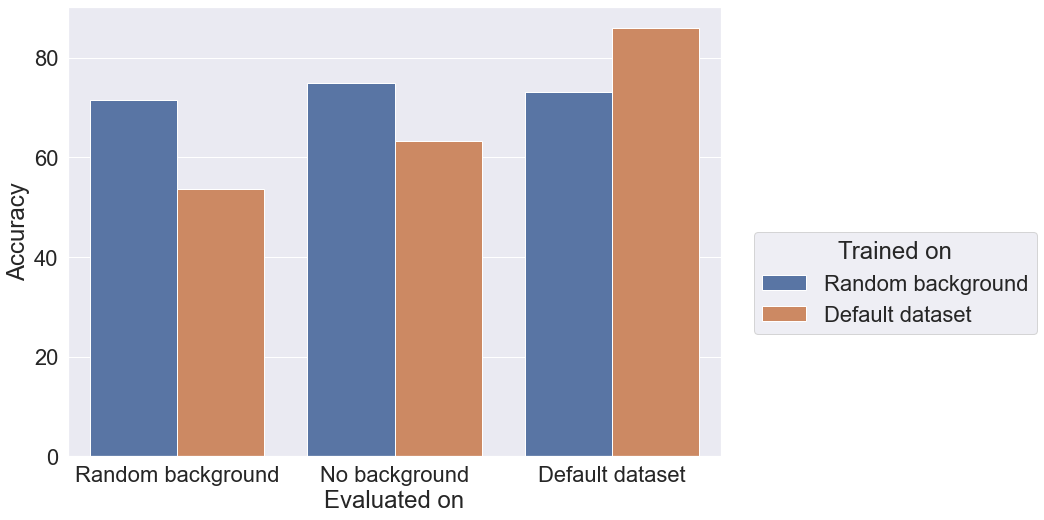

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = {'Trained on' : [], 'Evaluated on': [], 'Accuracy' : []}
for t in trained:
    for ds, i in zip(datasets, trained[t]):
        data['Trained on'].append(t)
        data['Evaluated on'].append(ds)
        data['Accuracy'].append(i)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="white", context="talk")
sns.set_style("ticks")
sns.despine()
sns.set(font_scale=2)
data = pd.DataFrame(data)
trained_on_series = ['ORIGINAL', 'MIXED-RAND']
evaluated_on_series = ['MIXED-RAND', 'ONLY-FG', 'ORIGINAL']
data = data[data['Trained on'].isin(trained_on_series)][data['Evaluated on'].isin(evaluated_on_series)]
def translate_data(data, dictionary):
    for i, c in enumerate(data):
        for j, d in enumerate(data[c]):
            if d in dictionary:
                data.iloc[j, i] = dictionary[d]
translate_data(data, {'ORIGINAL' : 'Default dataset', 'ONLY-FG' : "No background", 'MIXED-RAND' : 'Random background'})
sns.barplot(data=data, hue='Trained on', x='Evaluated on', y='Accuracy', order=['Random background', 'No background', 'Default dataset'], palette="deep")
plt.legend(title='Trained on', bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)

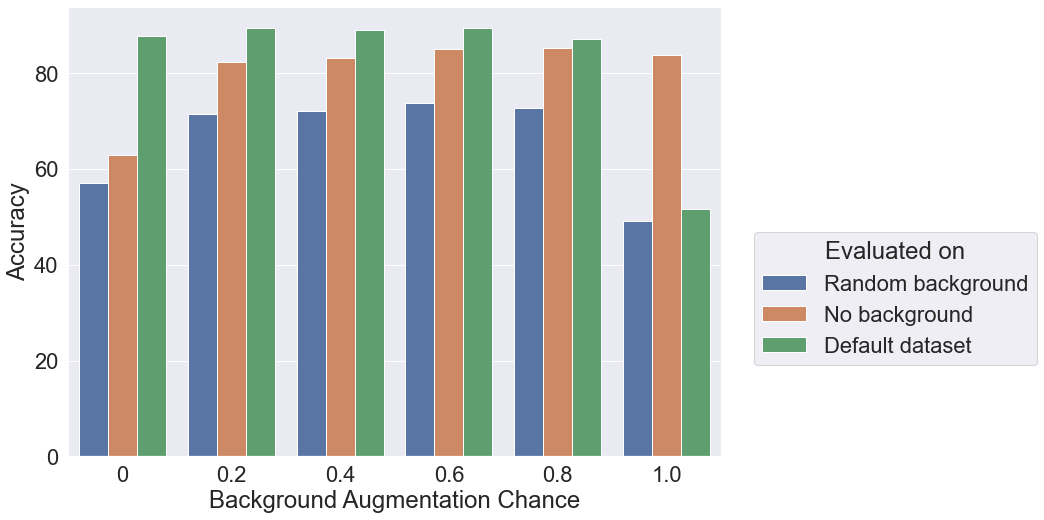

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="white", context="talk")
sns.set_style("ticks")
sns.despine()
sns.set(font_scale=2)
data = pd.DataFrame(rc_trained)
sns.barplot(data=data, hue='Evaluated on', x='Background Augmentation Chance', y='Accuracy', order=[0, 0.2, 0.4, 0.6, 0.8, 1.0], palette="deep")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0., title="Evaluated on")

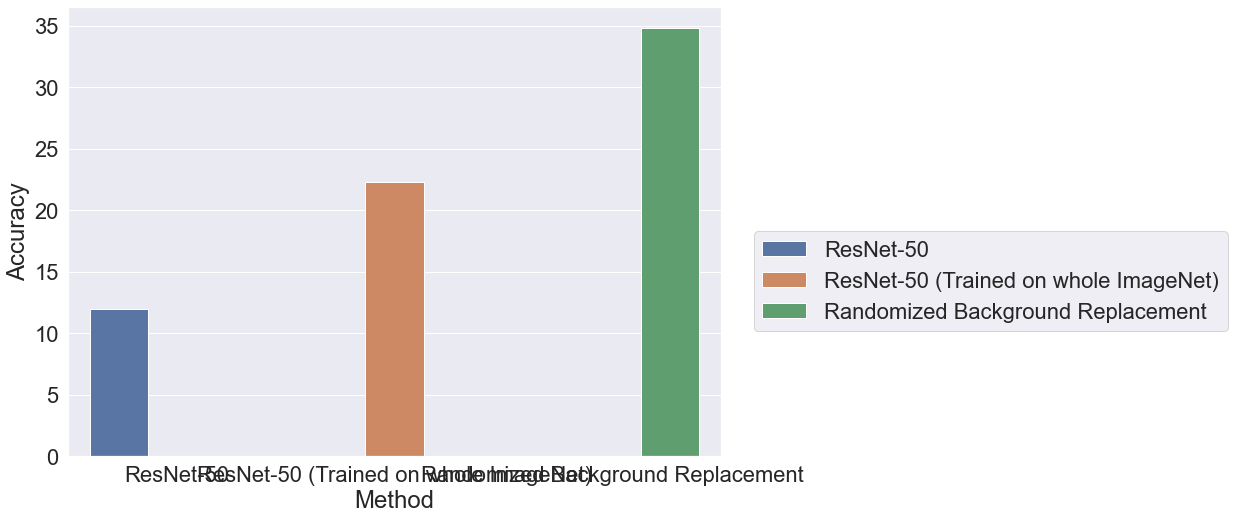

In [6]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="white", context="talk")
sns.set_style("ticks")
sns.despine()
sns.set(font_scale=2)
data = pd.DataFrame(bgc_results)
sns.barplot(data=data, hue='Method', x='Method', y='Accuracy', palette="deep")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)